# Exam 2 - Sneha Santosh Bhagwat (sxb176930)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Data Preprocessing

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# Information of train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 281 entries, Unnamed: 0 to class
dtypes: float64(116), int64(160), object(5)
memory usage: 878.2+ KB


In [4]:
# Information of test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 280 entries, Unnamed: 0 to chV6_QRSTA
dtypes: float64(106), int64(171), object(3)
memory usage: 113.9+ KB


In [5]:
# Shape of train and test datasets
print("Train:", train_data.shape)
print("Test:", test_data.shape)

Train: (400, 281)
Test: (52, 280)


In [6]:
# Display first 20 rows of train set
train_data.head(20)

,Unnamed: 0,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,124,37,1,159,56,75,162,339,141,96,...,0.0,5.0,-1.3,0.0,0,0.4,1.2,9.4,16.6,1
1,54,52,0,165,80,88,202,369,113,97,...,-0.5,10.7,-1.7,0.0,0,0.4,-0.3,19.6,17.7,16
2,298,12,1,165,47,91,0,359,152,0,...,0.0,8.8,-0.6,0.0,0,-0.4,1.6,24.0,38.0,10
3,311,80,0,160,70,90,201,404,157,111,...,0.0,13.0,-1.9,0.0,0,0.9,0.4,26.7,30.3,1
4,230,72,0,171,74,77,172,330,140,104,...,0.0,6.8,0.0,0.0,0,0.7,0.8,25.8,31.4,1
5,134,41,1,155,56,80,134,362,156,58,...,0.0,7.1,-1.4,0.0,0,0.6,2.9,12.8,38.9,10
6,12,54,1,172,58,78,155,382,163,81,...,0.0,6.3,-2.1,0.0,0,0.8,0.5,8.8,12.1,10
7,388,44,0,170,84,188,125,458,261,75,...,0.0,12.0,0.0,0.0,0,0.5,-6.0,86.4,8.4,9
8,392,51,1,165,85,81,158,357,148,109,...,0.0,12.4,-1.9,0.0,0,0.5,1.0,31.3,37.5,1
9,76,45,0,177,72,94,164,431,158,81,...,-1.9,0.0,0.0,0.0,0,0.6,-2.2,-8.3,-38.6,3


In [7]:
# Datatypes of columns in train dataset
pd.set_option('display.max_rows', 281)
train_data.dtypes

Unnamed: 0                        int64
age                               int64
sex                               int64
height                            int64
weight                            int64
QRSduration                       int64
PRinterval                        int64
Q-Tinterval                       int64
Tinterval                         int64
Pinterval                         int64
QRS                               int64
T                                object
P                                object
QRST                             object
J                                object
heartrate                        object
chDI_Qwave                        int64
chDI_Rwave                        int64
chDI_Swave                        int64
chDI_RPwave                       int64
chDI_SPwave                       int64
chDI_intrinsicReflecttions        int64
chDI_RRwaveExists                 int64
chDI_DD_RRwaveExists              int64
chDI_RPwaveExists                 int64


#### We find that columns T, P, QRST, J and heartrate are of type object in train dataset

In [8]:
# Datatypes of columns in test dataset
pd.set_option('display.max_rows', 281)
test_data.dtypes

Unnamed: 0                        int64
age                               int64
sex                               int64
height                            int64
weight                            int64
QRSduration                       int64
PRinterval                        int64
Q-Tinterval                       int64
Tinterval                         int64
Pinterval                         int64
QRS                               int64
T                                object
P                                object
QRST                              int64
J                                object
heartrate                         int64
chDI_Qwave                        int64
chDI_Rwave                        int64
chDI_Swave                        int64
chDI_RPwave                       int64
chDI_SPwave                       int64
chDI_intrinsicReflecttions        int64
chDI_RRwaveExists                 int64
chDI_DD_RRwaveExists              int64
chDI_RPwaveExists                 int64


We find that columns T, P, J are of type object in test dataset

In [9]:
# Finding uniques values in each column - Train dataset
for column in train_data:
    print(column)
    print(train_data[column].unique())

Unnamed: 0
[124  54 298 311 230 134  12 388 392  76 381 157 447 164 351  21 118   1
  10 252 367 179 421 113 297 390 347 220 224 213 445 378 295  37 231 236
 272 210 327 306 160 219 310 205 382 417 100 142 352  71 194 362 171   6
 107  78 366  15  60 403 144 361 368  56 188 102  96 391 451 414  90 287
 415 135  59 355 170 437  65 141 364 440 154 448 282 175 158 196 241 247
  49  52  74  26  45 122 159   4 249 233 208 271   8 253   5 336 268 132
   7 153 374  22  68 331  20 411 409  14 308 250 293 245 155  75  64  55
 289 186  81 369 274 328 424 431 332 221 278 191 239 410 261 300 106 413
  63 312 387 397 263  89 283  93 425 379 276  92  18 145 150 225 206 407
 240  66 344 383 140 101 353 238 371  17 146 200 441  30 114 428 103 330
 281 176 198 116 168 375 120 299 112 264 255 136 190 315 229 126 399 340
 322 133  33 429 162  34  44  97  85  61 167 199 173 435 246 443 385 301
 108 346 218  46 365 302 345  73 137 432  35 380  29 181 329 309  51 373
 401 217 442  27   2 232 408 156 303 427

  4.6 10.3 10.9  5.3  9.4 13.7  7.7 11.1  4.7 12.4  8.3  9.1]
chAVL_SwaveAmp
[ -1.   -1.3   0.   -1.7  -2.5  -0.7  -2.1  -5.4  -1.6  -0.9  -1.9  -3.1
  -5.1  -4.4  -6.7  -0.5  -6.5  -0.8  -1.4  -4.3  -1.8  -6.8  -5.3  -9.1
  -3.6  -5.6  -1.5  -0.4  -3.4  -2.2 -13.3  -5.8  -3.7  -3.3 -12.9  -2.3
  -2.4  -1.1  -5.7  -7.2  -2.7  -3.9  -2.   -4.6  -3.8  -3.   -2.9 -13.2
  -3.2  -4.9  -1.2 -12.1  -4.1  -2.6  -9.5  -2.8  -0.6  -4.2  -5.2  -8.8
  -3.5]
chAVL_RPwaveAmp
[0.  0.8 0.9 2.3 1.7 1.5]
chAVL_SPwaveAmp
[0]
chAVL_PwaveAmp
[-0.3  0.2  0.3  0.8  0.6 -0.5  1.3  0.4 -0.1  0.  -0.2 -0.4 -0.8  0.5
  0.9  0.1 -0.7 -1.4  1.   0.7 -0.6 -1.   2. ]
chAVL_TwaveAmp
[ 0.2 -0.2  1.1  1.3  0.5  0.6  0.1 -6.7  0.9 -0.8  1.   0.3 -0.4  1.2
  0.7 -0.7 -0.3 -0.5 -0.1  1.5  0.4  1.8 -1.  -3.  -1.3  0.8  1.6 -1.1
  1.7 -1.4  3.3  1.4 -3.5  1.9 -1.7  5.1 -0.6  2.   0.  -0.9 -2.2 -2.1
  2.1 -1.8 -1.2  2.7]
chAVL_QRSA
[-2.000e-01  4.400e+00  2.070e+01  1.750e+01  6.000e+00  3.000e-01
  2.140e+01  1.154e+02 -2.7

[ 7.000e+00  6.000e-01  1.850e+01 -3.390e+01  1.890e+01 -6.500e+00
 -1.500e+00 -2.900e+01  1.980e+01 -8.920e+01 -7.520e+01 -1.110e+01
 -2.210e+01  2.360e+01  1.100e+00 -2.170e+01 -1.170e+01 -5.700e+00
 -3.470e+01 -4.080e+01  3.300e+00  1.700e+00 -1.190e+01 -4.110e+01
  1.654e+02 -7.500e+00  1.120e+01  2.900e+00 -2.700e+00 -4.430e+01
 -2.780e+01  7.200e+00  8.600e+00  1.390e+01  6.600e+01 -1.670e+01
 -1.230e+01 -3.620e+01 -7.920e+01 -5.360e+01 -1.700e+01 -1.030e+01
  2.240e+01  1.500e+00 -9.090e+01  2.120e+01 -1.010e+01 -2.580e+01
  4.700e+00  4.200e+00 -3.050e+01 -2.030e+01 -1.980e+01 -1.400e+00
 -3.300e+01 -3.220e+01  1.080e+01  8.100e+00 -1.490e+01 -7.870e+01
  1.270e+01 -1.620e+01 -7.370e+01  4.300e+00 -5.040e+01  3.830e+01
 -8.800e+00 -2.430e+01 -1.990e+01 -1.700e+00 -2.730e+01 -1.300e+01
 -5.130e+01 -3.400e+01 -2.860e+01 -7.600e+00  1.930e+01  2.300e+00
 -1.090e+01  1.250e+01  2.770e+01  1.110e+01 -1.450e+01 -1.060e+01
  1.550e+01 -2.760e+01  1.820e+01 -2.000e-01 -2.570e+01 -1.200

In [10]:
# Train dataset
# Finding unique values in columns T, P, QRST, J, heartrate
for column in train_data:
    if train_data[column].dtypes == "object":
        print(column)
        print(train_data[column].unique())

T
['58' '79' '14' '-13' '42' '46' '177' '10' '-164' '-76' '4' '57' '-132'
 '78' '13' '37' '71' '117' '53' '-167' '0' '48' '36' '72' '52' '64' '65'
 '-52' '68' '51' '12' '35' '137' '49' '87' '107' '-4' '43' '-123' '33'
 '-23' '136' '-8' '113' '19' '16' '50' '21' '162' '45' '25' '24' '96' '81'
 '-115' '73' '17' '67' '-26' '55' '77' '30' '31' '40' '66' '56' '-177' '9'
 '60' '54' '28' '114' '69' '127' '11' '7' '39' '-5' '20' '-119' '-21'
 '-106' '-22' '-17' '-16' '-49' '86' '47' '23' '5' '-51' '70' '62' '142'
 '26' '-9' '18' '-24' '22' '?' '41' '-15' '38' '100' '3' '-63' '88' '63'
 '15' '133' '32' '-136' '44' '-92' '95' '8' '126' '172' '153' '34' '-27'
 '-10' '105' '164' '91' '84' '147' '75' '102' '174' '61' '125' '145' '-1'
 '-19' '29' '143' '-174' '-56' '160' '-121' '103' '108' '-2' '59' '175'
 '111' '27' '120' '-116' '-160' '104' '76' '179' '99' '83' '-68' '122'
 '150' '-75']
P
['73' '?' '39' '51' '71' '41' '-25' '65' '37' '72' '63' '40' '61' '-60'
 '67' '68' '-17' '78' '50' '-6' '55' '

In [11]:
# Finding uniques values in each column - Test dataset
for column in test_data:
    print(column)
    print(test_data[column].unique())

Unnamed: 0
[  9  25  31  32  39  47  70  72  87  88  99 115 117 127 147 151 163 165
 172 174 177 185 192 193 195 197 202 211 242 243 244 251 265 277 285 288
 292 314 323 333 335 337 338 359 396 398 404 412 420 423 436 438]
age
[50 44 58 45 30 37 31 40 68 36 39 28 61 34 32 24 25 55 27 65 46 18 49 72
 35 57 64 54 47 33 62 41 51]
sex
[1 0]
height
[167 169 163 160 175 158 155 161 162 159 185 173 176 156 170 180 172 168
 177 166 165 150 178 164 186]
weight
[67 80 68 73 57 60 65 70 45 56 95 54 75 72 48 78 55 79 81 63 85 87 76 83
 88 58 94 90 82]
QRSduration
[ 89 109  71  75  94  73  76  93 114 170  78  96  95  86 111  92  74 100
  88  77  84  87  98  85 101 107 105  82 108]
PRinterval
[130 128 136 125 163 137 166 173 191 192 118 153 197 127 171 115 145   0
 205 178 156 185 168 160 177 157 147 161 148 165 154 182 152 150 169 122
 203 144 146]
Q-Tinterval
[383 382 339 353 401 369 384 361 419 241 418 340 347 336 377 380 345 392
 332 413 310 321 407 322 376 334 362 373 355 352 359 354 379 333 35

[  2.1  -8.  -26.4 -24.4 -35.1 -20.8 -32.4 -25.1  10.3   7.8 -19.1 -19.3
 -50.7 -11.4 -40.7 -26.8   1.2 -28.9 -35.7 -27.  -13.2  22.   -0.8 -29.3
 -10.2 -15.8 -41.5 -34.7  -3.9  -2.1 -14.4 -32.  -17.9 -21.9 -18.2 -17.4
  -7.9 -21.4 -36.6  -6.6 -55.1  -4.4 -19.2  -1.3 -19.5 -12.7 -42.4  -8.1]
chV2_JJwaveAmp
[ 0.8  1.9  0.4  0.1  0.6  1.2  3.2  5.6  0.9  0.   1.8  1.4  1.5  2.3
  0.2 -0.3 -0.5  1.   1.1 -0.1  0.5  0.7  1.3 -2.   2.   2.1 -0.8]
chV2_QwaveAmp
[  0.   -1.9 -19.1  -6.5  -3.3  -0.5  -5.3]
chV2_RwaveAmp
[ 4.4  3.4  0.9  3.   2.6  3.3  2.3  6.7  0.   7.4  4.1  3.2  1.7  3.6
  4.3  5.6  0.7  6.5 11.6 10.9  3.7  7.   4.2  5.5  1.   4.   2.1  2.
  8.1  6.8  2.9 22.3  5.2 10.2  3.5]
chV2_SwaveAmp
[ -8.5 -16.7  -6.1 -11.1  -3.7  -5.6  -6.  -11.  -16.    0.   -8.8  -7.2
  -4.6  -1.7  -8.9  -9.2  -6.7 -19.7 -10.6  -9.   -5.4  -2.7  -6.2  -4.7
  -3.6 -18.3 -12.8 -11.9  -7.7  -4.   -4.8 -10.9  -9.9  -5.7  -8.  -18.
 -15.   -6.4  -7.1 -30.  -10.4  -2.2 -13.5  -7.6  -4.3]
chV2_RPwaveAmp
[

In [12]:
# Test dataset
# Finding unique values in columns T, P, J
for column in test_data:
    if test_data[column].dtypes == "object":
        print(column)
        print(test_data[column].unique())

T
['34' '112' '20' '32' '-8' '-18' '31' '45' '15' '-124' '-165' '22' '19'
 '60' '10' '18' '47' '57' '68' '73' '114' '56' '-82' '49' '14' '-172' '72'
 '7' '-103' '44' '-42' '30' '33' '100' '48' '25' '-163' '4' '-144' '87'
 '41' '?' '-132' '55' '149']
P
['70' '154' '61' '73' '36' '46' '67' '60' '120' '43' '52' '17' '64' '56'
 '58' '48' '69' '?' '50' '42' '57' '75' '51' '91' '-10' '76' '44' '74'
 '63' '28' '-7' '30' '45' '-52']
J
['?' '-93' '175' '-108' '169' '86' '-168' '-162' '121' '62']


Here we observe that all the columns with datatype object contain a character ? which signifies missing value

In [13]:
# Train dataset
# Handling the missing value
for column in train_data:
    if train_data[column].dtypes == "object":
        train_data[column] = train_data[column].replace('[?]', np.nan, regex=True)

In [14]:
# Test dataset
# Handling the missing value
for column in test_data:
    if test_data[column].dtypes == "object":
        test_data[column] = test_data[column].replace('[?]', np.nan, regex=True)

In [15]:
# Train dataset
# Finding total NA values in columns T, P, QRST, J, heartrate
print("Number of NA values in each column:")
for column in train_data:
    if train_data[column].dtypes == "object":
        print(column,":",train_data[column].isna().sum())
        
print("\nPercent of NA values in each column:")
for column in train_data:
    if train_data[column].dtypes == "object":
        print(column,": {:.2f}".format(train_data[column].isna().sum()/len(train_data)*100))

Number of NA values in each column:
T : 7
P : 17
QRST : 1
J : 333
heartrate : 1

Percent of NA values in each column:
T : 1.75
P : 4.25
QRST : 0.25
J : 83.25
heartrate : 0.25


In [16]:
# Test dataset
# Finding total NA values in columns T, P, J
print("Number of NA values in each column:")
for column in test_data:
    if test_data[column].dtypes == "object":
        print(column,":",test_data[column].isna().sum())
        
print("\nPercent of NA values in each column:")
for column in test_data:
    if test_data[column].dtypes == "object":
        print(column,": {:.2f}".format(test_data[column].isna().sum()/len(test_data)*100))

Number of NA values in each column:
T : 1
P : 5
J : 43

Percent of NA values in each column:
T : 1.92
P : 9.62
J : 82.69


#### Column J

In [17]:
# Column J has 83.25% NA values in train set and 82.69% NA values in test set
# if we impute this column it would introduce a bias in our data 
# Hence this column is being dropped
train_data = train_data.drop('J', axis=1)
test_data = test_data.drop('J', axis=1)

#### Column T

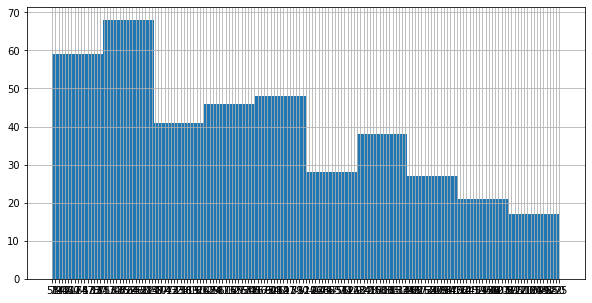

In [18]:
# Column T - Train set
train_data['T'].hist(figsize = (10,5))

In [19]:
# The data in column T is right skewed, we replace NA values in this column with mean of data
train_data['T'] = train_data['T'].fillna(train_data['T'].median())
train_data['T'] = train_data['T'].astype(int)

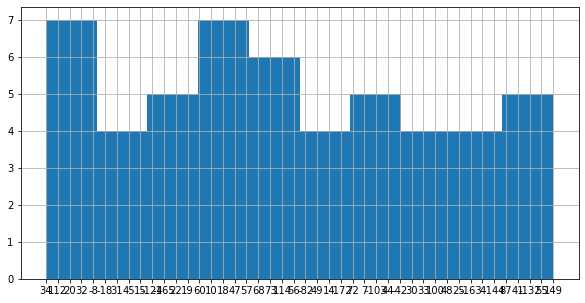

In [20]:
# Column T - Test set
test_data['T'].hist(figsize = (10,5))

In [21]:
# The data in column T is not skewed, we replace NA values in this column with median of data
test_data['T'] = test_data['T'].fillna(test_data['T'].median())
test_data['T'] = test_data['T'].astype(int)

#### Column P

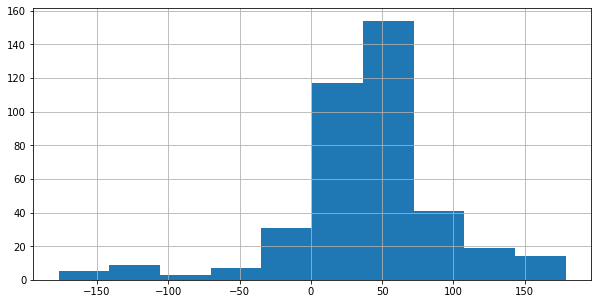

In [22]:
# Column P - Train set
train_data['T'].hist(figsize = (10,5))

In [23]:
# The data in column P is slightly skewed, we replace NA values in this column with median of data
train_data['P'] = train_data['P'].fillna(train_data['T'].median())
train_data['P'] = train_data['P'].astype(int)

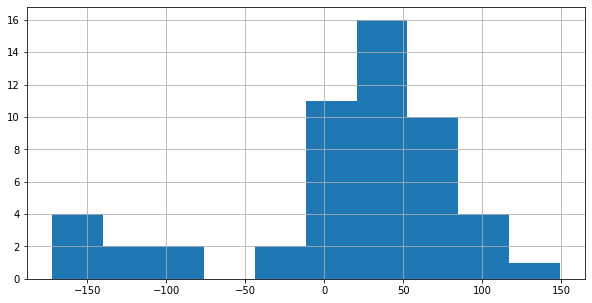

In [24]:
# Column P - Test set
test_data['T'].hist(figsize = (10,5))

In [25]:
# The data in column P is slightly skewed, we replace NA values in this column with median of data
test_data['P'] = test_data['P'].fillna(test_data['T'].median())
test_data['P'] = test_data['P'].astype(int)

#### Column QRST

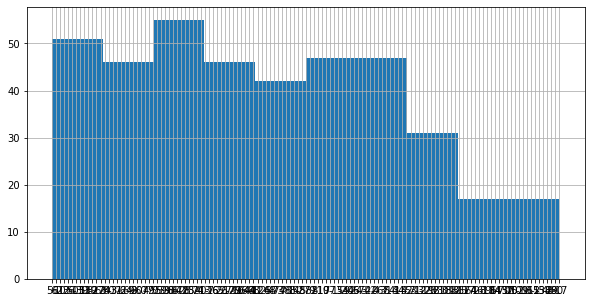

In [26]:
# Column QRST - Train set
train_data['QRST'].hist(figsize = (10,5))

In [27]:
# The data in column QRST is skewed, we replace NA values in this column with median of data
train_data['QRST'] = train_data['QRST'].fillna(train_data['T'].median())
train_data['QRST'] = train_data['QRST'].astype(int)

#### Column heartrate

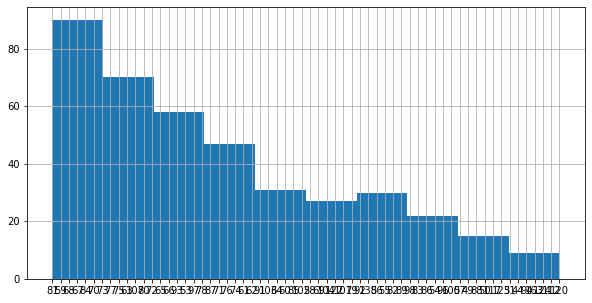

In [28]:
# Column heartrate - Train set
train_data['heartrate'].hist(figsize = (10,5))

In [29]:
# The data in column heartrate is skewed, we replace NA values in this column with median of data
train_data['heartrate'] = train_data['heartrate'].fillna(train_data['T'].median())
train_data['heartrate'] = train_data['heartrate'].astype(int)

In [30]:
# Finding if any column has NA values - Train set
train_data.isna().any()

Unnamed: 0                      False
age                             False
sex                             False
height                          False
weight                          False
QRSduration                     False
PRinterval                      False
Q-Tinterval                     False
Tinterval                       False
Pinterval                       False
QRS                             False
T                               False
P                               False
QRST                            False
heartrate                       False
chDI_Qwave                      False
chDI_Rwave                      False
chDI_Swave                      False
chDI_RPwave                     False
chDI_SPwave                     False
chDI_intrinsicReflecttions      False
chDI_RRwaveExists               False
chDI_DD_RRwaveExists            False
chDI_RPwaveExists               False
chDI_DD_RPwaveExists            False
chDI_RTwaveExists               False
chDI_DD_RTwa

In [31]:
# Finding if any column has NA values - Test set
train_data.isna().any()

Unnamed: 0                      False
age                             False
sex                             False
height                          False
weight                          False
QRSduration                     False
PRinterval                      False
Q-Tinterval                     False
Tinterval                       False
Pinterval                       False
QRS                             False
T                               False
P                               False
QRST                            False
heartrate                       False
chDI_Qwave                      False
chDI_Rwave                      False
chDI_Swave                      False
chDI_RPwave                     False
chDI_SPwave                     False
chDI_intrinsicReflecttions      False
chDI_RRwaveExists               False
chDI_DD_RRwaveExists            False
chDI_RPwaveExists               False
chDI_DD_RPwaveExists            False
chDI_RTwaveExists               False
chDI_DD_RTwa

We observe that no columns have NA values

#### Unnamed: 0 column 

In [32]:
# Finding number of unique values in this column for train and test se
print("Train:", train_data["Unnamed: 0"].nunique())
print("Test:", test_data["Unnamed: 0"].nunique())

Train: 400
Test: 52


This column has all unique values in both train and test set, it most probably signifies index of the entries in both the data sets. Hence, this column is being dropped since it doesn't provide any valuable information regarding the data.

In [33]:
train_data = train_data.drop('Unnamed: 0', axis=1)
test_data = test_data.drop('Unnamed: 0', axis=1)

In [34]:
# Counting number of instances for different values in class column
print(train_data['class'].value_counts())

1     214
10     48
2      39
6      23
16     19
5      13
3      13
4      12
9       8
14      4
7       3
15      2
8       2
Name: class, dtype: int64


We observe that the data is imbalanced, there are more values for no arrhythmia or 'normal' ECG than there are for presence of arrhythmia.
We also observe that there are no values for classes 11, 12, 13.

In [35]:
# Now checking the shape of data again
print("Train:", train_data.shape)
print("Test:", test_data.shape)

Train: (400, 279)
Test: (52, 278)


Here we observe that we still have a 278 columns to work on. Not all of these columns are useful in making final predictions. Hence, it's important to determine the important columns that are useful in predicting the target values.

**Hence we will use PCA(Principal Component Analysis) to reduce the dimensionality of the datasets.**

### Splitting and Scaling the data

In [36]:
X = train_data.loc[:,train_data.columns != 'class']
y = train_data['class']

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
final_test = scaler.transform(test_data)

In [37]:
for col in X.columns:
    print(X[col].dtypes)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
int64
float6

### PCA

In [161]:
pca = PCA(n_components=0.95, random_state=0)
X_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
final_test_reduced = pca.transform(final_test)

In [162]:
pca.n_components_

83

In [163]:
np.sum(pca.explained_variance_ratio_)

0.950871138964561

## Machine Learning Models

### K Neighbors Classifier

In [164]:
param_grid = {'n_neighbors': [3,5,7,9,11],
              'weights': ['uniform','distance'],
              'metric': ['euclidean','manhattan']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs = -1, cv=5, return_train_score=True)
grid_search_knn.fit(X_reduced, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [165]:
print("Best parameters: {}".format(grid_search_knn.best_params_))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


In [166]:
print("Best train score: {:.2f}".format(grid_search_knn.score(X_reduced,y_train)))
print("Best test score: {:.2f}".format(grid_search_knn.score(X_test_reduced,y_test)))

Best train score: 1.00
Best test score: 0.60


In [167]:
# Precision

# Train Precision
y_pred_train = grid_search_knn.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Precision
y_pred_test = grid_search_knn.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 1.00
Test Precision: 0.66


### Decision Tree Classifier

In [168]:
param_grid = {'max_depth': range(1,20)}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search_dt.fit(X_reduced, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20)}, return_train_score=True)

In [169]:
print("Best parameters: {}".format(grid_search_dt.best_params_))
print("Best train score: {:.2f}".format(grid_search_dt.score(X_reduced,y_train)))
print("Best test score: {:.2f}".format(grid_search_dt.score(X_test_reduced,y_test)))

Best parameters: {'max_depth': 1}
Best train score: 0.57
Best test score: 0.56


In [170]:
# Accuracy

# Train Precision
y_pred_train = grid_search_dt.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Precision
y_pred_test = grid_search_dt.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 0.53
Test Precision: 0.46


### Softmax Regression

In [171]:
param_grid = {'multi_class': ['multinomial'],
              'solver': ['lbfgs'],
              'C': [0.01, 0.1, 1, 10, 100]}
grid_search_smr = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search_smr.fit(X_reduced, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'multi_class': ['multinomial'], 'solver': ['lbfgs']},
             return_train_score=True)

In [172]:
print("Best parameters: {}".format(grid_search_smr.best_params_))
print("Best train score: {:.2f}".format(grid_search_smr.score(X_reduced,y_train)))
print("Best test score: {:.2f}".format(grid_search_smr.score(X_test_reduced,y_test)))

Best parameters: {'C': 1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best train score: 0.83
Best test score: 0.69


In [173]:
# Accuracy

# Train Precision
y_pred_train = grid_search_smr.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Precision
y_pred_test = grid_search_smr.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 0.97
Test Precision: 0.62


### LinearSVC

In [174]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100]}
grid_search_lsvc = GridSearchCV(LinearSVC(), param_grid, n_jobs = -1, cv=5, return_train_score=True)
grid_search_lsvc.fit(X_reduced, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [175]:
print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best train score: {:.2f}".format(grid_search_lsvc.score(X_reduced,y_train)))
print("Best test score: {:.2f}".format(grid_search_lsvc.score(X_test_reduced,y_test)))

Best parameters: {'C': 0.1}
Best train score: 0.81
Best test score: 0.72


In [176]:
# Precision

# Train Precision
y_pred_train = grid_search_lsvc.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Precision
y_pred_test = grid_search_lsvc.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 0.96
Test Precision: 0.79


### SVC with Linear Kernel

In [177]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_svcl = GridSearchCV(SVC(kernel="linear"), param_grid, n_jobs = -1, cv=5, return_train_score=True)
grid_search_svcl.fit(X_reduced, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [178]:
print("Best parameters: {}".format(grid_search_svcl.best_params_))
print("Best train score: {:.2f}".format(grid_search_svcl.score(X_reduced,y_train)))
print("Best test score: {:.2f}".format(grid_search_svcl.score(X_test_reduced,y_test)))

Best parameters: {'C': 1}
Best train score: 0.89
Best test score: 0.68


In [179]:
# Precision

# Train Precision
y_pred_train = grid_search_svcl.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Precision
y_pred_test = grid_search_svcl.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 0.98
Test Precision: 0.57


### SVC with RBF Kernel

In [180]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_rbf = GridSearchCV(SVC(kernel="rbf"), param_grid, n_jobs = -1, cv=5, return_train_score=True)
grid_search_rbf.fit(X_reduced, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [181]:
print("Best parameters: {}".format(grid_search_rbf.best_params_))
print("Best train score: {:.2f}".format(grid_search_rbf.score(X_reduced,y_train)))
print("Best test score: {:.2f}".format(grid_search_rbf.score(X_test_reduced,y_test)))

Best parameters: {'C': 10, 'gamma': 0.01}
Best train score: 0.76
Best test score: 0.71


In [182]:
# Precision

# Train Precision
y_pred_train = grid_search_rbf.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Precision
y_pred_test = grid_search_rbf.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 0.92
Test Precision: 0.84


### SVC with Poly Kernel

In [183]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_poly = GridSearchCV(SVC(kernel="poly"), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search_poly.fit(X_reduced, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [184]:
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best train score: {:.2f}".format(grid_search_poly.score(X_reduced,y_train)))
print("Best test score: {:.2f}".format(grid_search_poly.score(X_test_reduced,y_test)))

Best parameters: {'C': 100}
Best train score: 1.00
Best test score: 0.65


In [185]:
# Precision

# Train Precision
y_pred_train = grid_search_poly.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Precision
y_pred_test = grid_search_poly.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 1.00
Test Precision: 0.60


## Ensemble Learning Algorithms

### Voting Classifier

Using Softmax Regression, SVC with RBF Kernel and LinearSVC for hard voting classifier

In [186]:
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1)
rbf = SVC(kernel='rbf', C=10, gamma=0.01)
linearsvm = LinearSVC(C = 0.1)

voting_clf = VotingClassifier(estimators=[('softmax', softmax), ('rbf', rbf), ('svc', linearsvm)], voting='hard')
voting_clf.fit(X_reduced, y_train)

VotingClassifier(estimators=[('softmax',
                              LogisticRegression(C=1,
                                                 multi_class='multinomial')),
                             ('rbf', SVC(C=10, gamma=0.01)),
                             ('svc', LinearSVC(C=0.1))])

In [187]:
print("Train score: {:.2f}".format(voting_clf.score(X_reduced,y_train)))
print("Test score: {:.2f}".format(voting_clf.score(X_test_reduced,y_test)))

Train score: 0.81
Test score: 0.72


In [188]:
# Precision

# Train Precision
y_pred_train = voting_clf.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Precision
y_pred_test = voting_clf.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 0.97
Test Precision: 0.82


### Bagging 

In [189]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_bag_clf = BaggingClassifier(dt, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
dt_bag_clf.fit(X_reduced, y_train)

# Train and test scores
print('Train score: {:.2f}'.format(dt_bag_clf.score(X_reduced, y_train)))
print('Test score: {:.2f}'.format(dt_bag_clf.score(X_test_reduced, y_test)))

Train score: 0.85
Test score: 0.60


In [190]:
# Precision

# Train Precision
y_pred_train = dt_bag_clf.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Precision
y_pred_test = dt_bag_clf.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 0.98
Test Precision: 0.62


### Pasting

In [191]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_bag_clf = BaggingClassifier(dt, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)
dt_bag_clf.fit(X_reduced, y_train)

# Train and test scores
print('Train score: {:.2f}'.format(dt_bag_clf.score(X_reduced, y_train)))
print('Test score: {:.2f}'.format(dt_bag_clf.score(X_test_reduced, y_test)))

Train score: 0.89
Test score: 0.59


In [192]:
# Precision

# Train Precision
y_pred_train = dt_bag_clf.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Accuracy
y_pred_test = dt_bag_clf.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 0.99
Test Precision: 0.61


### Adaboost 

#### Decision Tree

In [193]:
dt_clf = DecisionTreeClassifier(max_depth=1, random_state=0)
dt_ada_clf = AdaBoostClassifier(dt_clf, n_estimators=500, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
dt_ada_clf.fit(X_reduced, y_train)

# Train and test scores
print('Train score: {:.2f}'.format(dt_ada_clf.score(X_reduced, y_train)))
print('Test score: {:.2f}'.format(dt_ada_clf.score(X_test_reduced, y_test)))

Train score: 0.62
Test score: 0.51


In [194]:
# Accuracy

# Train Accuracy
y_pred_train = dt_ada_clf.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Accuracy
y_pred_test = dt_ada_clf.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 0.69
Test Precision: 0.33


### Gradient Boosting

In [195]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_reduced, y_train)

print("Accuracy on training set: {:.2f}".format(gbrt.score(X_reduced, y_train)))
print("Accuracy on test set: {:.2f}".format(gbrt.score(X_test_reduced, y_test)))

Accuracy on training set: 0.88
Accuracy on test set: 0.57


In [196]:
# Precision

# Train Precision
y_pred_train = gbrt.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Precision
y_pred_test = gbrt.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 0.99
Test Precision: 0.49


### Random Forest

In [197]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_reduced, y_train)

# Train and test scores
print('Train score: {:.2f}'.format(rnd_clf.score(X_reduced, y_train)))
print('Test score: {:.2f}'.format(rnd_clf.score(X_test_reduced, y_test)))

Train score: 0.72
Test score: 0.59


In [198]:
# Precision

# Train Precision
y_pred_train = rnd_clf.predict(X_reduced)
print("Train Precision: {:.2f}".format(precision_score(y_train, y_pred_train, average='macro', labels=np.unique(y_pred_train))))

# Test Precision
y_pred_test = rnd_clf.predict(X_test_reduced)
print("Test Precision: {:.2f}".format(precision_score(y_test, y_pred_test, average='macro', labels=np.unique(y_pred_test))))

Train Precision: 0.95
Test Precision: 0.70


### Deep Learning

In [199]:
# create model
model = Sequential()
model.add(Dense(60, input_dim=83, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(17, activation='softmax'))

In [200]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [201]:
# Fit the model
model.fit(X_reduced, y_train, epochs=100, batch_size=20)

Epoch 1/100
16/16 [==============================] - 0s 917us/step - loss: 2.7791 - accuracy: 0.0875
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 2.6252 - accuracy: 0.4344
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 2.4560 - accuracy: 0.5437
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 2.2496 - accuracy: 0.5500
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 2.0053 - accuracy: 0.5437
Epoch 6/100
16/16 [==============================] - 0s 978us/step - loss: 1.7915 - accuracy: 0.5375
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 1.6277 - accuracy: 0.5375
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 1.5124 - accuracy: 0.5719
Epoch 9/100
16/16 [==============================] - 0s 976us/step - loss: 1.4170 - accuracy: 0.5875
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 1.3348 - accuracy: 0.6125
Epo

In [202]:
# evaluate the model

# train score
train_scores = model.evaluate(X_reduced, y_train)
print("Train data:")
print("%s: %.2f%%\n" % (model.metrics_names[1], train_scores[1]*100))

# test score
test_scores = model.evaluate(X_test_reduced, y_test)
print("Test data:")
print("%s: %.2f%%" % (model.metrics_names[1], test_scores[1]*100))

10/10 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 1.0000
Train data:
accuracy: 100.00%

3/3 [==============================] - 0s 1ms/step - loss: 1.7969 - accuracy: 0.6625
Test data:
accuracy: 66.25%


# Conclusion

After running Machine Learning classification models and ensemble learning models, I observed that LinearSVC was giving good train and test scores (**0.81 and 0.72 respectively**). The precision for train and test prediction is **0.96 and 0.79 respectively**.

#### Hence, I am choosing LinearSVC for final prediction.

In [203]:
svm = LinearSVC(C=0.1)
svm.fit(X_reduced, y_train)

# predicting outcome for test data 
final_test_prediction = svm.predict(final_test_reduced)
test = pd.read_csv('test.csv')
test['class'] = final_test_prediction
test.to_csv('final_test_prediction.csv', index=False)

### Note:

Final predictions are stored in **final_test_prediction array**. 

Final csv file obtained is final_test_prediction.csv which contains original test data and predicted values in 'class' column. 